Code with new CSV

Research questions: What is the relationship between income & breast cancer survival months? Is there one?
What is the relationship between race & breast cancer survival months? Is there one?
What is the relationship between age & breast cancer survival months? Is there one?
What is the relationship between income & stage at diagnosis? Is there one?
What is the relationship between race & stage at diagnosis? Is there one?
What is the relationship between age & stage at diagnosis? Is there one?
How do the breast cancer stages (T, N, M) affect survival months?

Below is the imports for the project

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import spearmanr
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import sklearn as sklearn
import seaborn as sns

CSV File

In [2]:
data = pd.read_csv("bcfile.csv")

In [3]:
df = pd.DataFrame(data)

Exploratory Data Analysis

In [ ]:
df.head

In [8]:
df.columns

Index(['Race recode (W, B, AI, API)',
       'Breast - Adjusted AJCC 6th T (1988-2015)',
       'Breast - Adjusted AJCC 6th N (1988-2015)',
       'Breast - Adjusted AJCC 6th M (1988-2015)', 'Patient ID',
       'Age recode with single ages and 85+',
       'Median household income inflation adj to 2019', 'Survival months'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8720795 entries, 0 to 8720794
Data columns (total 8 columns):
 #   Column                                         Dtype 
---  ------                                         ----- 
 0   Race recode (W, B, AI, API)                    object
 1   Breast - Adjusted AJCC 6th T (1988-2015)       object
 2   Breast - Adjusted AJCC 6th N (1988-2015)       object
 3   Breast - Adjusted AJCC 6th M (1988-2015)       object
 4   Patient ID                                     int64 
 5   Age recode with single ages and 85+            object
 6   Median household income inflation adj to 2019  object
 7   Survival months                                object
dtypes: int64(1), object(7)
memory usage: 532.3+ MB


In [ ]:
df.describe()

In [10]:
df.duplicated().any()

True

In [11]:
num_duplicates = df.duplicated().sum()
print("Number of duplicates:", num_duplicates)

Number of duplicates: 94690


Remove dups


In [4]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().any()

False

In [13]:
df.shape

(8626105, 8)

Check if there are NA'S

In [36]:
df.isna().any()

Age recode with single ages and 85+                      False
Survival months                                          False
Race recode (W, B, AI, API)_POC                          False
Race recode (W, B, AI, API)_White                        False
Breast - Adjusted AJCC 6th T (1988-2015)_T0, T2 to T4    False
Breast - Adjusted AJCC 6th T (1988-2015)_T1amic          False
Breast - Adjusted AJCC 6th T (1988-2015)_TX, Mets, is    False
Breast - Adjusted AJCC 6th N (1988-2015)_N0              False
Breast - Adjusted AJCC 6th N (1988-2015)_Not N0          False
Encoded_income                                           False
dtype: bool

Get rid of 'Blanks', nan, and 'Unknown'

In [5]:
df.dropna(inplace=True)
# drop na seems to have removed 'Blanks' rows
df = df[~df['Breast - Adjusted AJCC 6th T (1988-2015)'].str.contains('Blank\(s\)')]
# drop na seems to have removed 'Unknown' rows
df = df[~df['Survival months'].str.contains('Unknown')]
df = df[~df['Race recode (W, B, AI, API)'].str.contains('Unknown')]

In [35]:
df.dropna(inplace=True)

In [23]:
# checks for nan's and blanks after
df.isna().any()

Race recode (W, B, AI, API)                      False
Breast - Adjusted AJCC 6th T (1988-2015)         False
Breast - Adjusted AJCC 6th N (1988-2015)         False
Breast - Adjusted AJCC 6th M (1988-2015)         False
Patient ID                                       False
Age recode with single ages and 85+              False
Median household income inflation adj to 2019    False
Survival months                                  False
dtype: bool

In [ ]:
df['Age recode with single ages and 85+'].shape

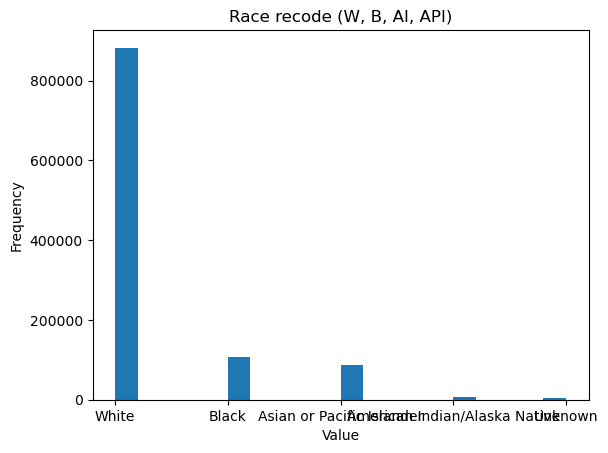

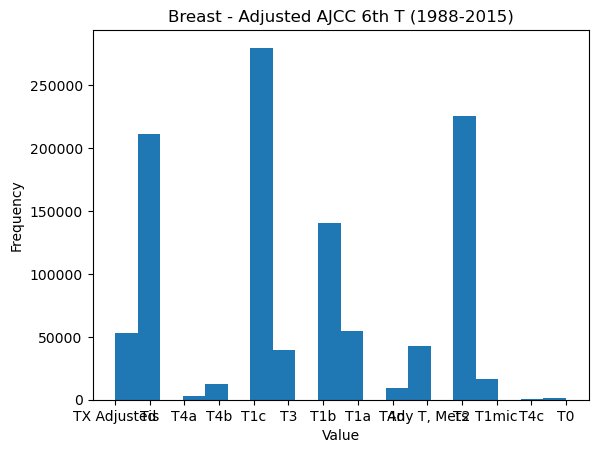

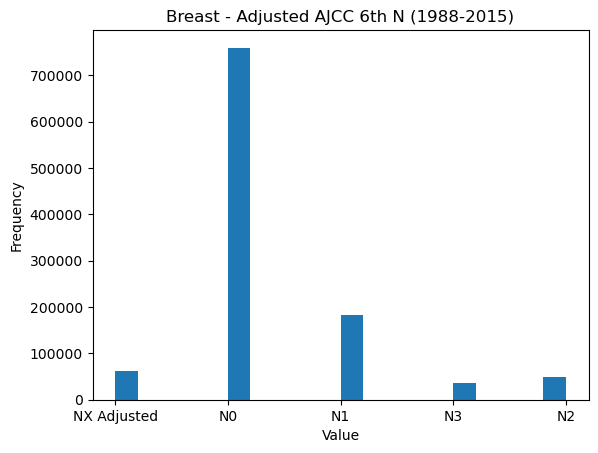

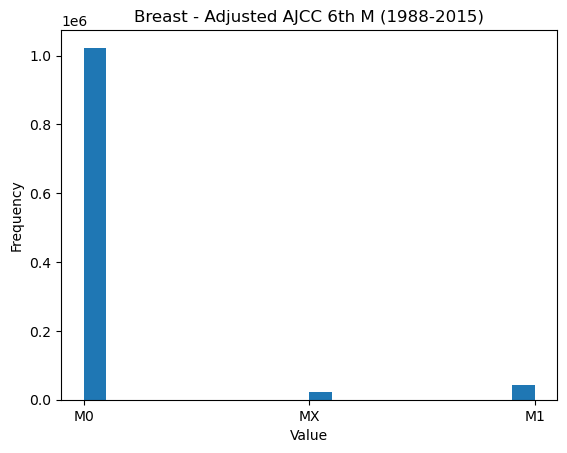

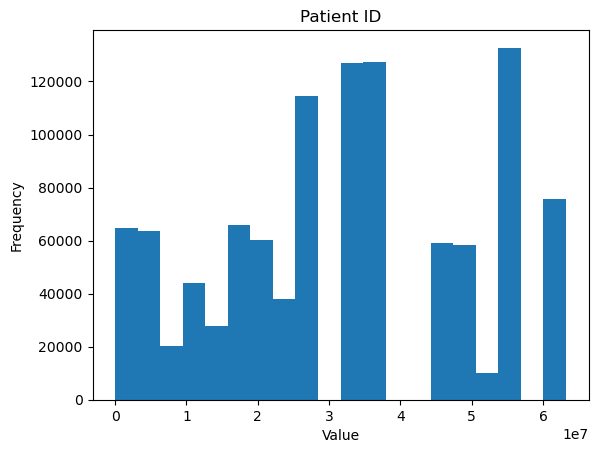

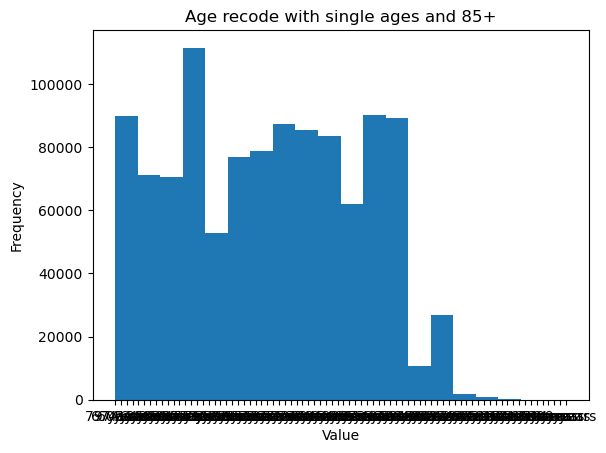

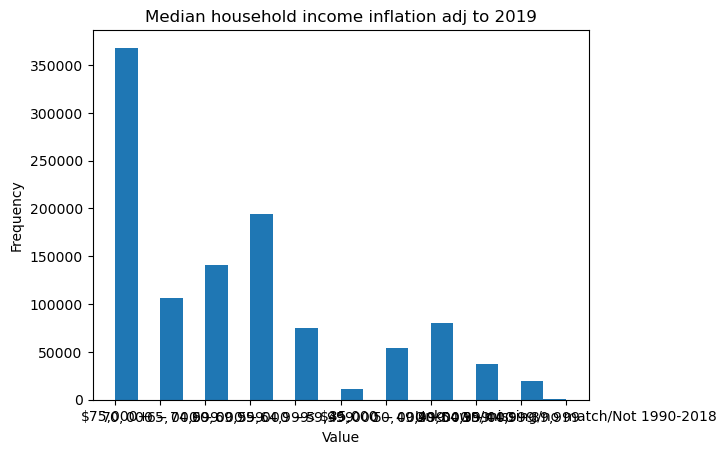

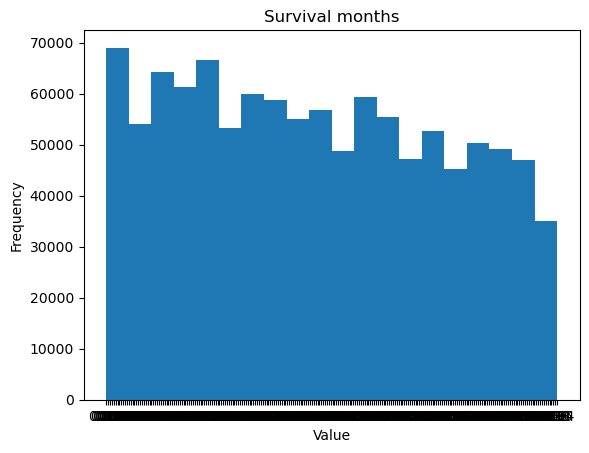

In [29]:
import matplotlib.pyplot as plt

for col in df.columns:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [32]:
print(df['Median household income inflation adj to 2019'].unique())

['$75,000+' '$70,000 - $74,999' '$65,000 - $69,999' '$60,000 - $64,999'
 '$55,000 - $59,999' '< $35,000' '$45,000 - $49,999' '$50,000 - $54,999'
 '$40,000 - $44,999' '$35,000 - $39,999'
 'Unknown/missing/no match/Not 1990-2018']


In [42]:
print(df['Age recode with single ages and 85+'].unique())

[79 67 60 74 41 54 64 35 44 82 83 56 84 62 85 71 59 75 30 34 58 78 50 36
 55 57 68 53 37 61 52 76 72 77 63 80 70 49 45 42 48 46 28 65 81 73 66 43
 47 69 51 29 31 38 40 39 32 33 21 27 24 26 22 23 25 18 20 19 17 13  2 16
 12 15  8 10 14  9]


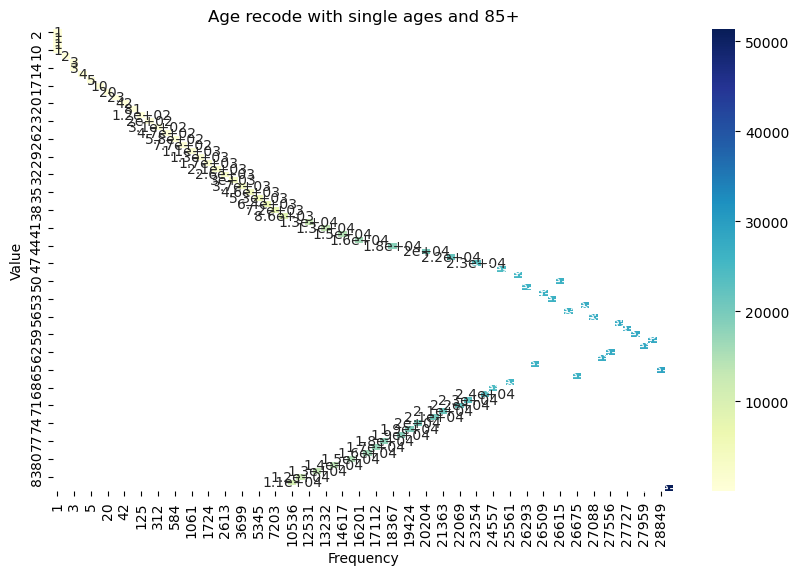

In [43]:
column_name = 'Age recode with single ages and 85+'
frequency_table = df[column_name].value_counts()
heatmap_data = frequency_table.reset_index().rename(columns={'index': 'Value', column_name: 'Frequency'})

# Reshape the data for heatmap
heatmap_data = heatmap_data.pivot(index='Value', columns='Frequency', values='Frequency')

# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')

# Set the title and labels
plt.title('Age recode with single ages and 85+')
plt.xlabel('Frequency')
plt.ylabel('Value')

# Show the heatmap
plt.show()

One hot encoding for columns

In [12]:
print(df['Race recode (W, B, AI, API)'].unique())

['White' 'Black' 'Asian or Pacific Islander'
 'American Indian/Alaska Native']


In [6]:
combine_values = ['Black', 'Asian or Pacific Islander', 'American Indian/Alaska Native']
combined_category = 'POC'

df['Race recode (W, B, AI, API)'] = df['Race recode (W, B, AI, API)'].apply(lambda x: combined_category if x in combine_values else x)

In [14]:
print(df['Race recode (W, B, AI, API)'].unique())

['White' 'POC']


In [7]:
race_encode = 'Race recode (W, B, AI, API)'

race_encoded = pd.get_dummies(df[race_encode], prefix = race_encode)

df = pd.concat([df, race_encoded], axis=1)

df.drop('Race recode (W, B, AI, API)', axis=1, inplace=True)

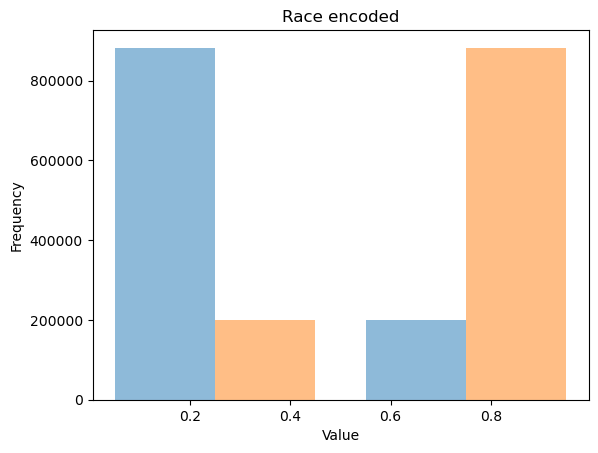

In [30]:
# Display the histogram
import matplotlib.pyplot as plt
plt.hist(race_encoded, bins=2, alpha=0.5)
plt.title('Race encoded')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [15]:
print(df['Survival months'].unique())
print(df['Breast - Adjusted AJCC 6th T (1988-2015)'].unique())
print(df['Breast - Adjusted AJCC 6th N (1988-2015)'].unique())
print(df['Breast - Adjusted AJCC 6th M (1988-2015)'].unique())

['0014' '0000' '0081' '0007' '0224' '0048' '0050' '0130' '0028' '0087'
 '0075' '0069' '0089' '0182' '0010' '0129' '0074' '0192' '0017' '0225'
 '0015' '0147' '0062' '0161' '0072' '0146' '0043' '0076' '0115' '0019'
 '0099' '0070' '0029' '0101' '0058' '0012' '0103' '0094' '0053' '0098'
 '0218' '0018' '0223' '0021' '0049' '0171' '0092' '0160' '0222' '0042'
 '0142' '0065' '0059' '0056' '0044' '0151' '0054' '0131' '0106' '0117'
 '0055' '0116' '0005' '0197' '0172' '0122' '0032' '0206' '0239' '0085'
 '0174' '0120' '0107' '0138' '0083' '0073' '0024' '0150' '0002' '0096'
 '0033' '0004' '0040' '0067' '0057' '0009' '0100' '0105' '0123' '0186'
 '0022' '0068' '0104' '0217' '0215' '0210' '0178' '0163' '0031' '0211'
 '0034' '0119' '0154' '0093' '0143' '0111' '0051' '0047' '0008' '0185'
 '0086' '0159' '0052' '0061' '0149' '0221' '0013' '0088' '0234' '0139'
 '0204' '0200' '0135' '0193' '0220' '0212' '0090' '0091' '0037' '0045'
 '0158' '0109' '0125' '0152' '0113' '0011' '0097' '0187' '0025' '0227'
 '0080

In [10]:
combine_tvalues = ['TX Adjusted', 'Tis', 'Any T, Mets']
combined_tcategory = 'TX, Mets, is'
df['Breast - Adjusted AJCC 6th T (1988-2015)'] = df['Breast - Adjusted AJCC 6th T (1988-2015)'].apply(lambda x: combined_tcategory if x in combine_tvalues else x)

combine_tvalues4 = ['T4a', 'T4b', 'T4d', 'T4c', 'T3', 'T2', 'T0']
combined_tcat4 = 'T0, T2 to T4'
df['Breast - Adjusted AJCC 6th T (1988-2015)'] = df['Breast - Adjusted AJCC 6th T (1988-2015)'].apply(lambda x: combined_tcat4 if x in combine_tvalues4 else x)

combine_tvalues1 = ['T1c', 'T1b', 'T1a', 'T1mic']
combined_tcat1 = 'T1amic'
df['Breast - Adjusted AJCC 6th T (1988-2015)'] = df['Breast - Adjusted AJCC 6th T (1988-2015)'].apply(lambda x: combined_tcat1 if x in combine_tvalues1 else x)

tstage_encode = 'Breast - Adjusted AJCC 6th T (1988-2015)'

tstage_encoded = pd.get_dummies(df[tstage_encode], prefix = tstage_encode)

df = pd.concat([df, tstage_encoded], axis=1)

df.drop('Breast - Adjusted AJCC 6th T (1988-2015)', axis=1, inplace=True)

NameError: name 'col' is not defined

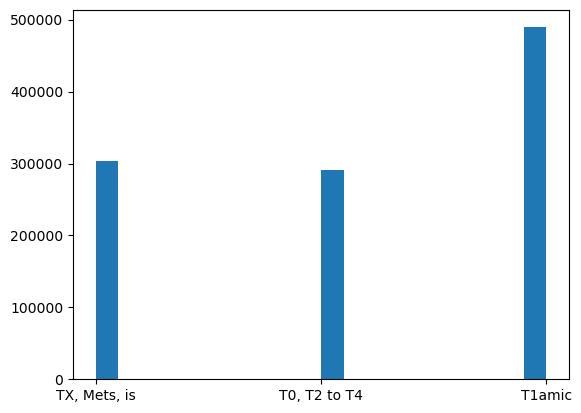

In [9]:
plt.hist(df['Breast - Adjusted AJCC 6th T (1988-2015)'], bins=20)
plt.title(col)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [11]:
combine_nvalues = ['NX Adjusted', 'N1', 'N3', 'N2']
combined_ncat = 'Not N0'
df['Breast - Adjusted AJCC 6th N (1988-2015)'] = df['Breast - Adjusted AJCC 6th N (1988-2015)'].apply(lambda x: combined_ncat if x in combine_nvalues else x)


NameError: name 'col' is not defined

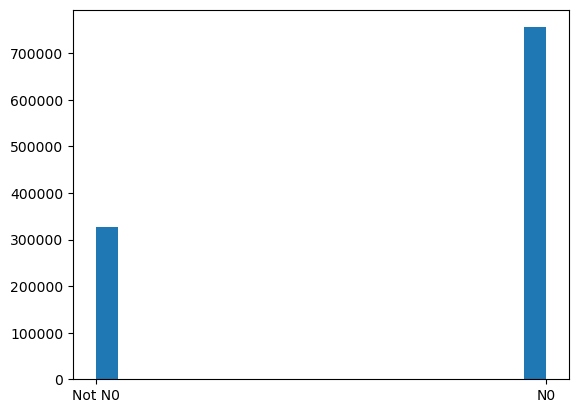

In [12]:
plt.hist(df['Breast - Adjusted AJCC 6th N (1988-2015)'], bins=20)
plt.title(col)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [13]:
nstage_encode = 'Breast - Adjusted AJCC 6th N (1988-2015)'

nstage_encoded = pd.get_dummies(df[nstage_encode], prefix = nstage_encode)

df = pd.concat([df, nstage_encoded], axis=1)

df.drop('Breast - Adjusted AJCC 6th N (1988-2015)', axis=1, inplace=True)

In [14]:
# mstage_encode = 'Breast - Adjusted AJCC 6th M (1988-2015)'

# mstage_encoded = pd.get_dummies(df[mstage_encode], prefix = mstage_encode)

# df = pd.concat([df, mstage_encoded], axis=1)

# df.drop('Breast - Adjusted AJCC 6th M (1988-2015)', axis=1, inplace=True)

# M stage was not very significant, so just dropped it
df = df.drop('Breast - Adjusted AJCC 6th M (1988-2015)', axis=1)

Cleaning data for age, income, and race

In [16]:
# instead of encoding age, remove "years" from value and change it to int type
df['Age recode with single ages and 85+'] = df['Age recode with single ages and 85+'].str.replace(' years', '')

# # there is a value with 85+ years, so replace '85+' with 85
df['Age recode with single ages and 85+'] = df['Age recode with single ages and 85+'].replace('85+', '85')

# convert 'Age recode' column to int
df['Age recode with single ages and 85+'] = df['Age recode with single ages and 85+'].astype(int)

In [20]:
# income_encode = 'Median household income inflation adj to 2019'

# income_encoded = pd.get_dummies(df[income_encode], prefix = income_encode)

# df = pd.concat([df, income_encoded], axis=1)

# df.drop('Median household income inflation adj to 2019', axis=1, inplace=True)

income_encode = 'Median household income inflation adj to 2019'

income_ranges = {
    '$35,000 - $39,999': 35000,
    '$40,000 - $44,999': 40000,
    '$45,000 - $49,999': 45000,
    '$50,000 - $54,999': 50000,
    '$55,000 - $59,999': 55000,
    '$60,000 - $64,999': 60000,
    '$65,000 - $69,999': 65000,
    '$70,000 - $74,999': 70000,
    '$75,000+': 75000,
    '< $35,000': 35000,
    'Unknown/missing/no match/Not 1990-2018': None  # Replace with appropriate value if needed
}

df['Encoded_income'] = df[income_encode].map(income_ranges)
df.drop(income_encode, axis=1, inplace=True)

In [18]:
df['Survival months'] = df['Survival months'].astype(int)

In [22]:
df.drop('Patient ID', axis=1, inplace=True)

In [ ]:
print(income_encoded.columns.unique())
print(race_encoded.columns.unique())
print(df['Survival months'].unique())

In [23]:
print(df.dtypes)

Age recode with single ages and 85+                        int32
Survival months                                            int32
Race recode (W, B, AI, API)_POC                            uint8
Race recode (W, B, AI, API)_White                          uint8
Breast - Adjusted AJCC 6th T (1988-2015)_T0, T2 to T4      uint8
Breast - Adjusted AJCC 6th T (1988-2015)_T1amic            uint8
Breast - Adjusted AJCC 6th T (1988-2015)_TX, Mets, is      uint8
Breast - Adjusted AJCC 6th N (1988-2015)_N0                uint8
Breast - Adjusted AJCC 6th N (1988-2015)_Not N0            uint8
Encoded_income                                           float64
dtype: object


After processing data

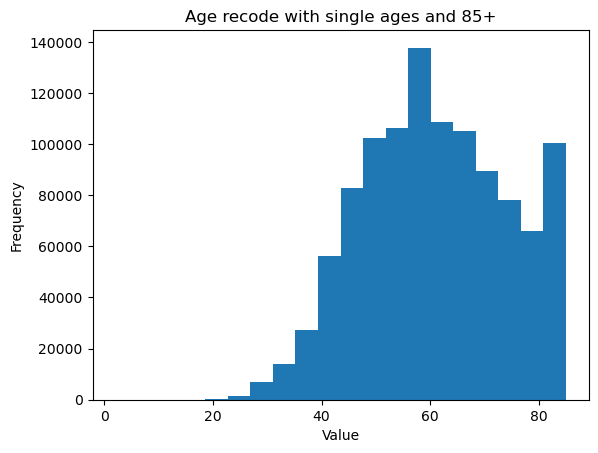

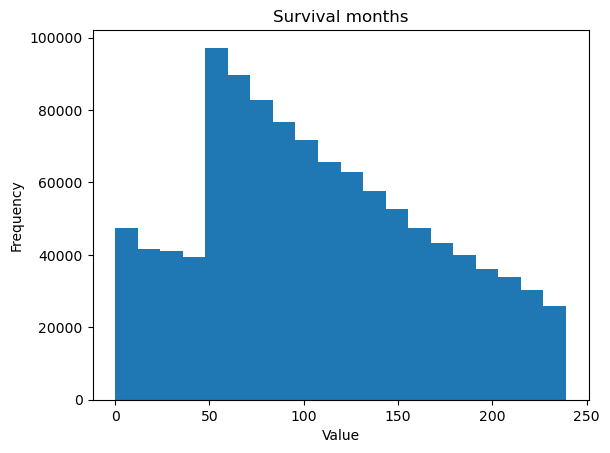

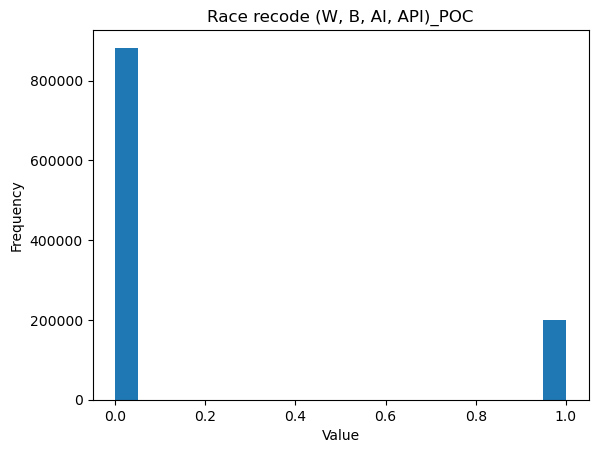

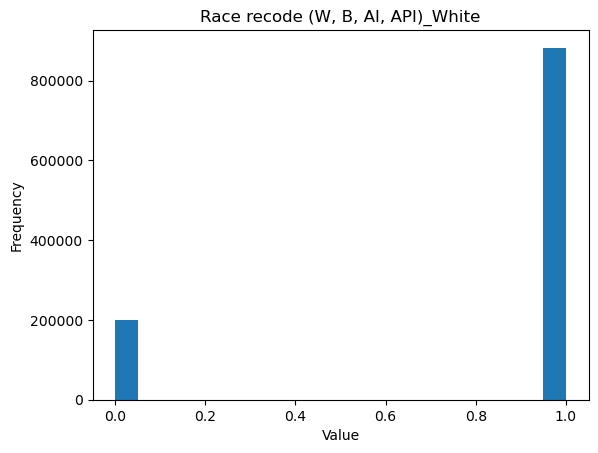

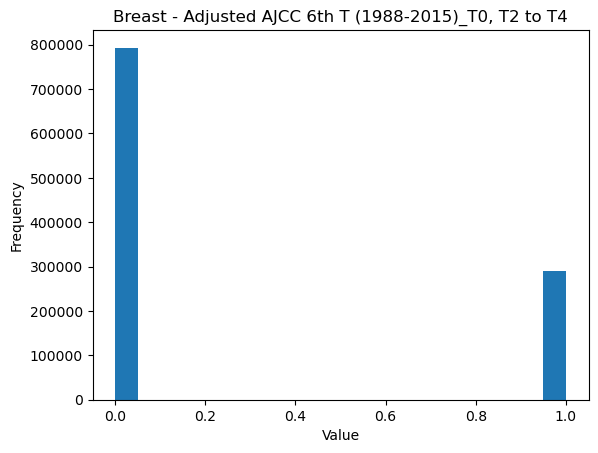

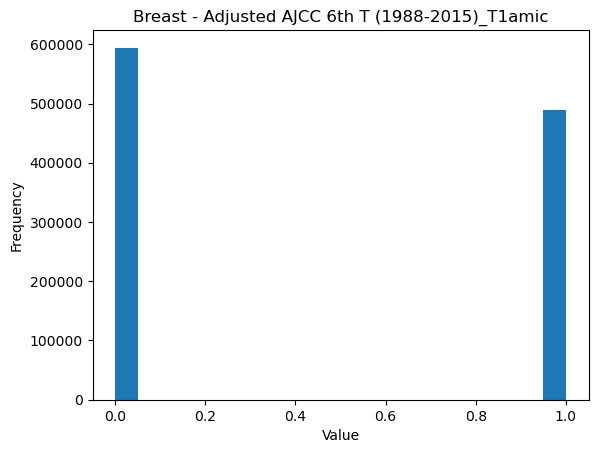

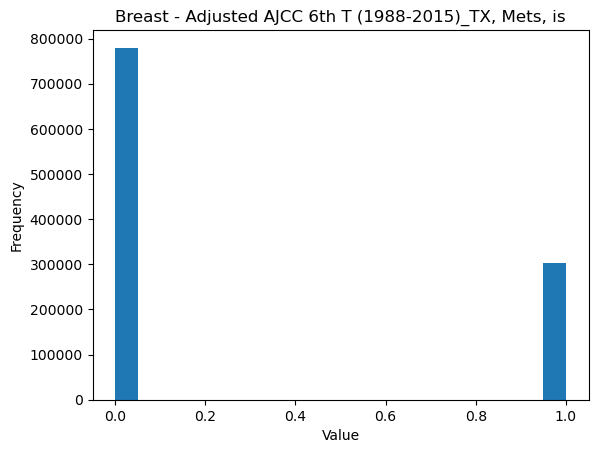

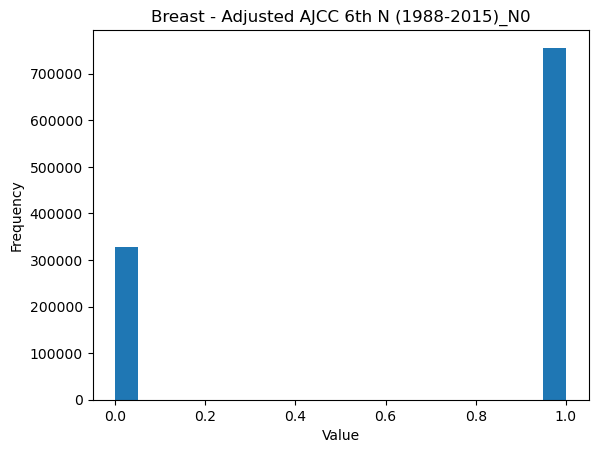

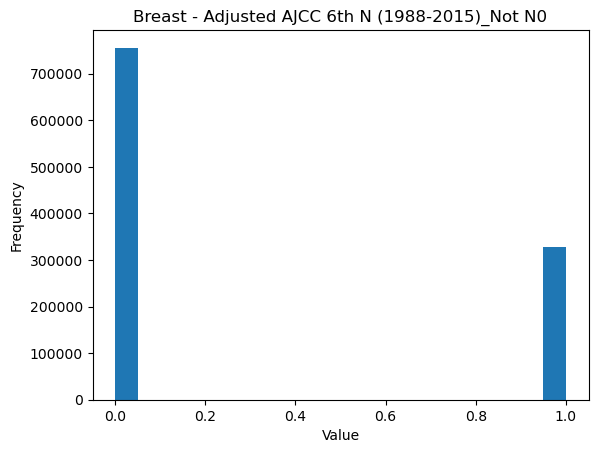

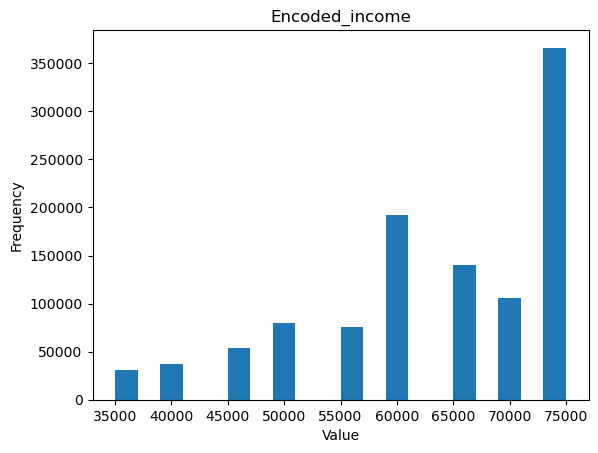

In [24]:
import matplotlib.pyplot as plt

for col in df.columns:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

Rerun original code

In [31]:
folds = 5

kf = KFold(n_splits=folds, shuffle=True, random_state=42)

# Define the machine learning model
model = LinearRegression()

Put just age to see if it's a bad score to see if model is accurate.

In [37]:
i = 0
# Iterate over the K folds
for train_index, val_index in kf.split(df):

    # Split the data into training and validation sets
    train_data = df.iloc[train_index]
    val_data = df.iloc[val_index]


    # Define the one hot encoded columns
    cols = df.columns
    cols_list = cols.tolist()
    cols_three = pd.concat([race_encoded, pd.DataFrame(df['Age recode with single ages and 85+']), pd.DataFrame(df['Encoded_income'])], axis=1)
    # cols_three = pd.DataFrame(df['Age recode with single ages and 85+'])
    # cols_three = pd.DataFrame(df.drop(columns=['Survival months'])

    # Define training vars
    X_train = train_data[cols_three.columns]
    X_val = val_data[cols_three.columns]
    y_train = train_data['Survival months']
    y_val = val_data['Survival months']

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Calculate mean squared error on validation
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    i = i+1
    print(f"Fold {i} MSE: {mse:.2f} R2: {r2:.2f}")


Fold 1 MSE: 3430.77 R2: 0.07
Fold 2 MSE: 3430.34 R2: 0.07
Fold 3 MSE: 3406.63 R2: 0.08
Fold 4 MSE: 3402.94 R2: 0.08
Fold 5 MSE: 3400.56 R2: 0.08


Linear Regression with PCA and onehot encoding separate

In [ ]:
X = pd.concat([pd.DataFrame(df['Race recode (W, B, AI, API)']),pd.DataFrame(df['Age recode with single ages and 85+']), pd.DataFrame(df['Median household income inflation adj to 2019'])], axis=1)
y = df['Survival months']

In [56]:
X = pd.DataFrame(race_encoded)
y = df['Encoded_income']

In [ ]:
X = df.drop(columns=['Survival months'])
y = df['Survival months']

In [ ]:
X = pd.DataFrame(race_encoded)
y = df['Survival months']

In [ ]:
X = pd.DataFrame(income_encoded)
y = df['Survival months']

In [47]:
X = pd.DataFrame(df['Age recode with single ages and 85+']).values.reshape(-1, 1)
y = df['Survival months']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

ValueError: Found input variables with inconsistent numbers of samples: [1083646, 1083374]

In [40]:
#instantiate column selectors instead of onehotencode
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [41]:
#intantiate imputers for missing values
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [43]:
#instantiate the numerical pipeline
num_pipe = make_pipeline(mean_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [44]:
#instantiate the categorical pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [45]:
#create the tuple for column transformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

#create the preprocessor column transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [46]:
#transform the data
#fit only the train data
preprocessor.fit(X_train)

#trainsform train and test data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

ValueError: make_column_selector can only be applied to pandas dataframes

In [ ]:
#see the column transformer steps
preprocessor.named_transformers_

In [ ]:
#extract feature names from ohe
cat_feature_names = preprocessor.named_transformers_['pipeline-2']\
                    .named_steps['onehotencoder']\
                    .get_feature_names_out(cat_selector(X_train))
cat_feature_names

In [ ]:
final_cols = num_selector(X_train) + list(cat_feature_names)

In [ ]:
#view transformed data as a dataframe
X_train_df = pd.DataFrame(X_train_processed, columns = final_cols)
X_test_df = pd.DataFrame(X_test_processed, columns = final_cols)

display(X_train_df.head())
X_test_df.head()

In [ ]:
#inspect the result of scaled data and ohe
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

In [50]:
#instantiate the model
linreg = LinearRegression()

#create pipeline
linreg_pipe = make_pipeline(preprocessor, linreg)

#fit the pipeline
linreg_pipe.fit(X_train, y_train)

ValueError: make_column_selector can only be applied to pandas dataframes

In [49]:
#function that shows all needed values
def eval_model(true, pred):
  mse = mean_squared_error(true, pred)
  r2 = r2_score(true, pred)
  print(f' MSE: {mse}, \n R2: {r2}')

#results
print('Train Evaluation')
eval_model(y_train, linreg_pipe.predict(X_train))
print('\nTest Evaluation')
eval_model(y_test, linreg_pipe.predict(X_test))

Train Evaluation


NameError: name 'linreg_pipe' is not defined

MEasure variance

In [57]:
# standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [52]:
#instantiate the model
model = LinearRegression()

#fit 
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# perform PCA
pca = PCA(n_components=1, svd_solver='full')
X_pca = pca.fit_transform(X_std)

In [54]:
# print the explained variance ratio
print(pca.explained_variance_ratio_)

[1.]


This means that the total variance for PCA is low (around 27.16% in total). Since I applied PCA, low total variance means that the total amount of variability in the data captured by the principal components is relatively small. I assume this is happening because there is a predominant amount of one value (in race_encoded) that makes the data more homogenous.

Experiment with Spearmanr Coefficient (rec by Sheena) to see if there is a relationship between variables, this is displayed as a matrix, doesn't tell me much.

In [ ]:
corr, pval = spearmanr(X, y)

print("Spearmanr Coefficient: %0.3f", corr)

Linear regression without and with PCA have the same results with high MSE & low R2. May need to choose a different model.

Run original data through OSL

In [ ]:
X = df.drop(columns=['Survival months', 'Patient ID'])
y = df['Survival months']

In [ ]:
model = sm.OLS(y,X)
results = model.fit()

single lin reg w/o PCA - income & survival months

In [ ]:
# Convert the categorical variable to one-hot encoding
onehot = pd.get_dummies(df['Median household income inflation adj to 2019'], prefix='income')
df = pd.concat([df, onehot], axis=1)
df = df.drop(['Median household income inflation adj to 2019'], axis=1)

In [ ]:
# Convert the categorical variable to one-hot encoding
onehot = pd.get_dummies(df['Race recode (W, B, AI, API)'], prefix='race')
df = pd.concat([df, onehot], axis=1)
df = df.drop(['Race recode (W, B, AI, API)'], axis=1)

In [ ]:
X = df.drop(['Race recode (W, B, AI, API)',
       'Breast - Adjusted AJCC 6th T (1988-2015)',
       'Breast - Adjusted AJCC 6th N (1988-2015)',
       'Breast - Adjusted AJCC 6th M (1988-2015)', 'Patient ID',
       'Age recode with single ages and 85+', 'Survival months'], axis=1)
X = sm.add_constant(X)
y = df['Survival months']

In [ ]:
df.columns

In [ ]:
model = sm.OLS(y,X)
results = model.fit()

In [ ]:
results.tvalues

In [ ]:
print(results.summary())

In [ ]:
import prince
import pprint

## Instantiate FAMD object
famd = prince.FAMD(
     n_components=25,
     n_iter=10,
     copy=True,
     check_input=True,
     engine='sklearn',       ## Can be "auto", 'sklearn', 'fbpca'
     random_state=42)

## Fit FAMD object to data 
famd = famd.fit(df.drop('Survival months', axis=1)) ## Exclude target variable "Churn"



## Inspect principal dimensions
# pp = pprint.PrettyPrinter()
print(famd.explained_variance_ratio_) 

Is there a relationship between race & income? If there is, then it could be combined

In [ ]:
X = pd.concat([race_encoded], axis=1)
X = sm.add_constant(X)
y = pd.concat([income_encoded], axis=1)

In [ ]:
model = sm.OLS(y,X)
results = model.fit()

Using pearson for smaller variables

In [ ]:
# Calculate Pearson correlation coefficient and p-value
corr, p_value = pearsonr(X, y)
print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

In [ ]:
results.tvalues

In [ ]:
print(results.summary())